In [8]:
import seaborn as sns
diamonds=sns.load_dataset("diamonds")
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
df=df.select_dtypes(include=[float,int])
df.dropna()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [10]:
df_table=df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<AxesSubplot:xlabel='table'>

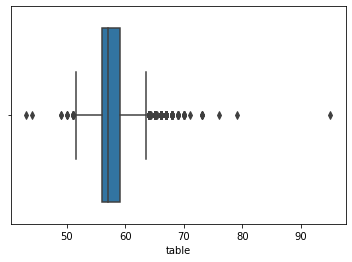

In [11]:
sns.boxplot(x=df_table)

In [12]:
Q1=df_table.quantile(0.25)
Q1

56.0

In [13]:
Q3=df_table.quantile(0.75)
Q3

59.0

In [14]:
IQR=(Q3-Q1)
IQR

3.0

In [15]:
alt_sinir= Q1-(1.5*IQR)
ust_sinir=Q3+(1.5*IQR)

In [16]:
alt_sinir

51.5

In [17]:
ust_sinir

63.5

In [18]:
df_table[(df_table<alt_sinir)|(df_table>ust_sinir)]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [19]:
df_table[(df_table<alt_sinir)].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

In [20]:
df_table[(df_table>ust_sinir)].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=589)

# silme yöntemi

In [21]:
import pandas as pd

In [22]:
type(df_table)

pandas.core.series.Series

In [23]:
df_table=pd.DataFrame(df_table)

In [25]:
df_table.shape

(53940, 1)

In [28]:
t_df=df_table[~((df_table<alt_sinir)|(df_table>ust_sinir)).any(axis=1)]

In [29]:
t_df.head()

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0


In [30]:
t_df.shape

(53335, 1)

# ortalama ile doldurma

In [53]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [54]:
df_table = df["table"]

In [55]:
aykiri_tf = (df_table < alt_sinir)

In [56]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [57]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [58]:
df_table.mean()

57.45718390804603

In [59]:
df_table[aykiri_tf] = df_table.mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14544\3741757661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = df_table.mean()


In [60]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

In [61]:
aykiri_tf2=(df_table > ust_sinir)

In [62]:
df_table[aykiri_tf2]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 589, dtype: float64

In [63]:
df_table[aykiri_tf2]=df_table.mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14544\4276325231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf2]=df_table.mean()


In [64]:
df_table[aykiri_tf2]

2        57.459505
91       57.459505
145      57.459505
219      57.459505
227      57.459505
           ...    
53695    57.459505
53697    57.459505
53756    57.459505
53757    57.459505
53785    57.459505
Name: table, Length: 589, dtype: float64

In [65]:
df_table.head()

0    55.000000
1    61.000000
2    57.459505
3    58.000000
4    58.000000
Name: table, dtype: float64

### data frame de aykırı değerleri ortalama ile değiştirdik

# baskılama yöntemi

In [66]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [67]:
df_table=df["table"]

In [68]:
alt_aykiri=(df_table < alt_sinir)

In [69]:
Q1=df_table.quantile(0.25)
Q3=df_table.quantile(0.75)
alt=Q1-1.5*(Q3-Q1)
ust=Q3+1.5*(Q3-Q1)

In [70]:
alt

51.5

In [71]:
ust

63.5

In [73]:
df_table[alt_aykiri]=alt

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14544\78089939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[alt_aykiri]=alt


In [74]:
ust_aykiri=(df_table > ust_sinir)

In [76]:
df_table[ust_aykiri]=ust

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14544\2231001138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[ust_aykiri]=ust


In [80]:
df_table[alt_aykiri].head()

1515    51.5
3238    51.5
3979    51.5
4150    51.5
5979    51.5
Name: table, dtype: float64

In [81]:
df_table[ust_aykiri].head()

2      63.5
91     63.5
145    63.5
219    63.5
227    63.5
Name: table, dtype: float64

### * bu şekilde alt sınırımızdan küçük değerleri alt sınıra 
### * üst sınırımızdan büyükleri de üst sınıra eşitledik